# Regression demo: LinearRegression vs Ridge
This notebook loads a small real-world dataset (Diabetes) and fits the
project's `LinearRegression` and `Ridge` models from `doxa.algorithms.regression`.
We then compare evaluation metrics and plot predictions.

In [2]:
import doxa as dx

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from doxa.algorithms.regression import LinearRegression, Ridge
from doxa import Tensor
from doxa import metrics as doxa_metrics

print('Libraries imported successfully')

Libraries imported successfully


In [4]:
# Load dataset
data = load_diabetes(as_frame=False)
X = data['data']
y = data['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes: (353, 10) (89, 10) (353,) (89,)


In [5]:
# Fit LinearRegression (project implementation)
lr = LinearRegression()
lr.fit(X_train, y_train)
print('LinearRegression fitted. _fitted=', lr._fitted)

# Fit Ridge (project implementation)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('Ridge fitted. _fitted=', ridge._fitted)

LinearRegression fitted. _fitted= True
Ridge fitted. _fitted= True


In [6]:
# Predictions and evaluation
pred_lr = lr.predict(X_test).data
pred_ridge = ridge.predict(X_test).data

metrics = {
    'LinearRegression': {
        'MSE': float(doxa_metrics.mse(y_true=y_test, y_pred=pred_lr)),
        'R2': float(doxa_metrics.r2_score(y_true=y_test, y_pred=pred_lr)),
        'RMSE': float(doxa_metrics.rmse(y_true=y_test, y_pred=pred_lr))
    },
    'Ridge': {
        'MSE': float(doxa_metrics.mse(y_true=y_test, y_pred=pred_ridge)),
        'R2': float(doxa_metrics.r2_score(y_true=y_test, y_pred=pred_ridge)),
        'RMSE': float(doxa_metrics.rmse(y_true=y_test, y_pred=pred_ridge))
    }
}

import pprint
pprint.pprint(metrics)

{'LinearRegression': {'MSE': 2900.193628493476,
                      'R2': 0.4526027629719205,
                      'RMSE': 53.85344583676588},
 'Ridge': {'MSE': 3077.41593882723,
           'R2': 0.41915292635986545,
           'RMSE': 55.47446204180109}}


Doxa Model Report
Model: LinearRegression (method=auto, fit_intercept=True)

Training Summary:
| Key           | Value   |
|---------------|---------|
| Method        | auto    |
| Fit Intercept | True    |
| Device        | cpu     |
| Fitted        | True    |


C:\ishan\code\doxa\doxa\algorithms\regression\linear_regression.py:267: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


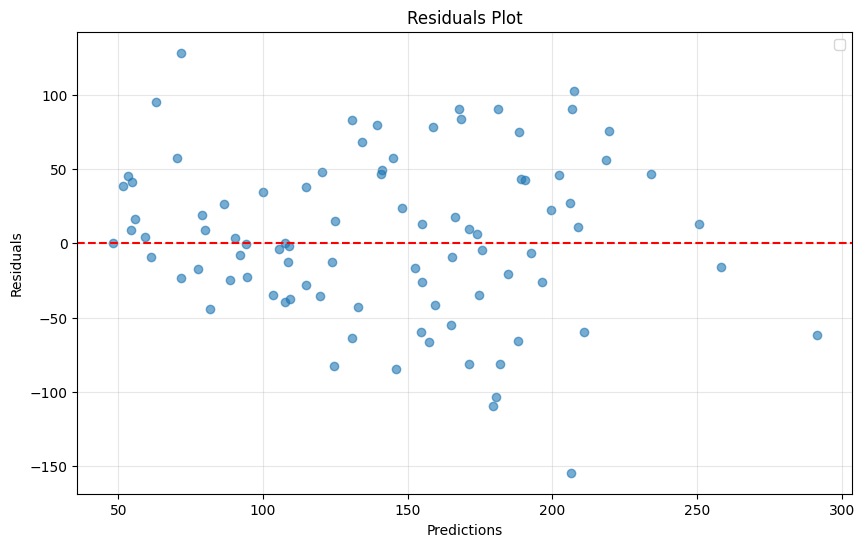

In [ ]:
lr.report()
lr.explain()
lr.viz(X_train, y_train)

Doxa Model Report
Model: Ridge (alpha=1.0, method=auto, fit_intercept=True)

Training Summary:
| Key           | Value   |
|---------------|---------|
| Method        | auto    |
| Alpha         | 1.0     |
| Fit Intercept | True    |
| Device        | cpu     |
| Fitted        | True    |


C:\ishan\code\doxa\doxa\algorithms\regression\ridge.py:370: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


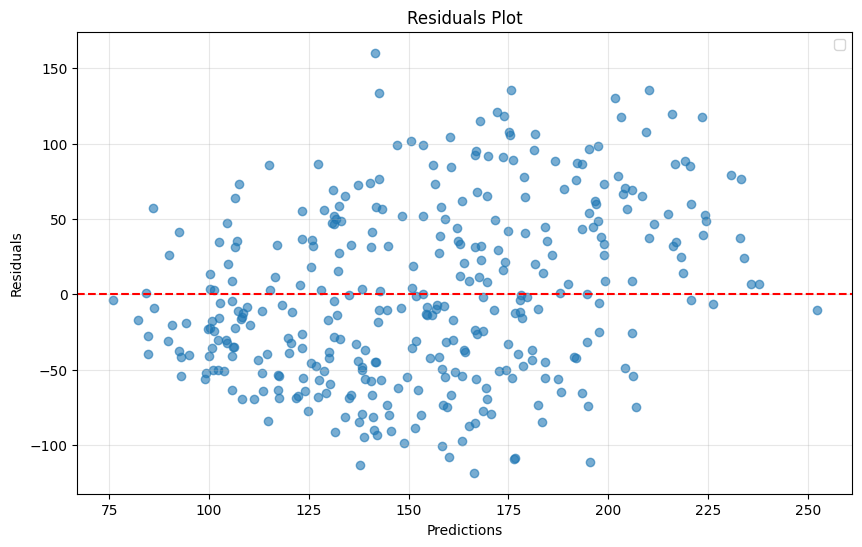

In [14]:
ridge.report()
ridge.explain()
ridge.viz(X_train, y_train)

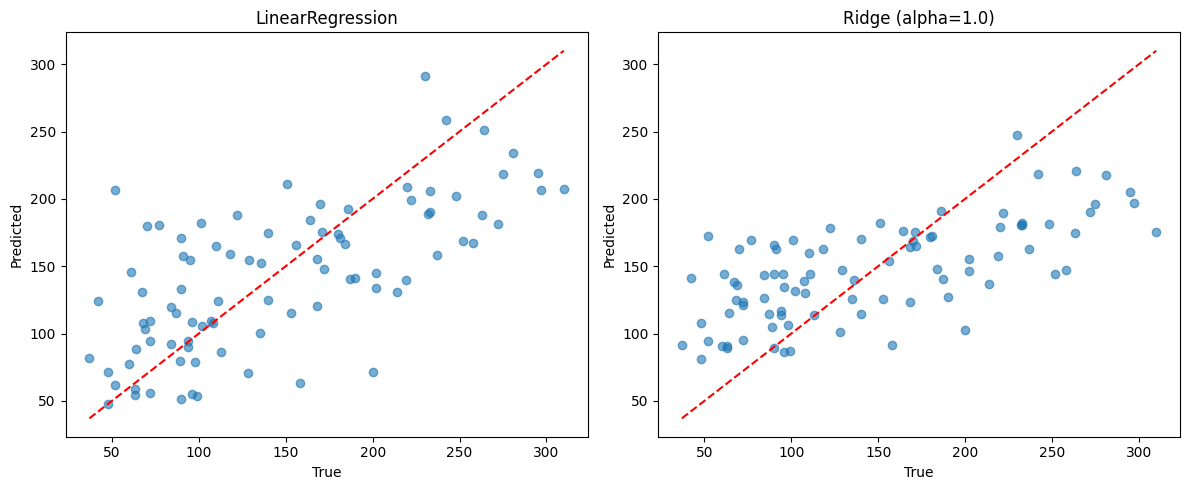

In [7]:
# Plot true vs predicted for both models
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('LinearRegression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Ridge (alpha=1.0)')

plt.tight_layout()
plt.show()